In [1]:
from IPython.core.display import display, HTML
display(HTML("<style>.container { width:101% !important; }</style>"))
import matplotlib.pyplot as plt

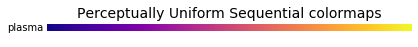

In [2]:
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
from matplotlib import cm
# from colorspacious import cspace_converter
from collections import OrderedDict
cmaps = OrderedDict()
#cmaps['Perceptually Uniform Sequential'] = ['viridis', 'plasma', 'inferno', 'magma', 'cividis']
cmaps['Perceptually Uniform Sequential'] = ['plasma']
gradient = np.linspace(0, 1, 256)
gradient = np.vstack((gradient, gradient))
def plot_color_gradients(cmap_category, cmap_list):
    # Create figure and adjust figure height to number of colormaps
    nrows = len(cmap_list)
    figh = 0.35 + 0.15 + (nrows + (nrows - 1) * 0.1) * 0.22
    fig, axs = plt.subplots(nrows=nrows + 1, figsize=(6.4, figh))
    fig.subplots_adjust(top=1 - 0.35 / figh, bottom=0.15 / figh,
                        left=0.2, right=0.99)
    axs[0].set_title(cmap_category + ' colormaps', fontsize=14)

    for ax, name in zip(axs, cmap_list):
        ax.imshow(gradient, aspect='auto', cmap=plt.get_cmap(name))
        ax.text(-0.01, 0.5, name, va='center', ha='right', fontsize=10,
                transform=ax.transAxes)
    # Turn off *all* ticks & spines, not just the ones with colormaps.
    for ax in axs:
        ax.set_axis_off()
for cmap_category, cmap_list in cmaps.items():
    plot_color_gradients(cmap_category, cmap_list)
plt.show()

In [3]:
import numpy as np
import csv
FRFN   = "./HLC/muf_os9_frames_info.txt" # Needed the leading "." to indicate present dir
FRL    = [] # FRame List
FRLndx = 0  # FRame List index
with open(FRFN, newline='') as fileOpen:
    fileOpenReader = csv.reader(fileOpen, delimiter='\t')
    for line in fileOpenReader:
        if FRLndx > 0 :
            tk=line[0].split()
            record=[]
            record.append('%.6f'%float(tk[0]))
            record.append(int(tk[1]))
            record.append(int(tk[2]))
            record.append(int(tk[3]))
            record.append(int(tk[4]))
            record.append(float(tk[5]))
            record.append(FRLndx-1)            
            FRL.append(record)
        FRLndx=FRLndx+1

# print(len(FRL))
# for record in FRL:
#     print(record)

In [4]:
"""
# Ygouf 2021 Page 11:
# "File name MUFs Noise Planets Flux Units
# ...
# muf os9 ccd images with planets.fits X X X EMCCD counts"
# So this data has MUFs, Noise, and Planets, and uses EMCCD counts
"""
from astropy.io import fits
fitsFN    = "./HLC/os9_hlc_muf/muf_os9_ccd_images_with_planets.fits"
HDUL      = fits.open(fitsFN)
refcount  = 0
mtgcount  = 0
ptgcount  = 0
startii   = 0
end__ii   = 0
noc       = 0 # next object code
loc       = 0 # next object code
summaryL  = [] # summary List
summaryL.append(startii)
for ii in range (len(HDUL[0].data)):
    #print(HDUL[0].data[ii][0][0], "...", HDUL[0].data[ii][0][len(HDUL[0].data[ii][0])-1])
    noc = FRL[ii][1] * FRL[ii][3] + FRL[ii][4]
    if noc != loc :
        end__ii = ii-1
        if ii> 0 : 
            summaryL.append(end__ii)
            summaryL.append(end__ii-startii+1)
            summaryL.append(loc-FRL[ii][4]+1)
            summaryL.append(    FRL[ii][4]-1)
            summaryL.append(    FRL[ii-1][5])
        startii = ii
        if ii> 0 : summaryL.append(startii)
    if   ( noc == 0 + FRL[ii][4]):
        #print(       ii,FRL[ii][0],"ref",refcount,noc-FRL[ii][4],loc-FRL[ii][4],end__ii,startii)
        refcount=refcount+1
    elif ( noc == -11 + FRL[ii][4] ):
        #print("\t"  ,ii,FRL[ii][0],"mtg",mtgcount,noc-FRL[ii][4],loc-FRL[ii][4],end__ii,startii)
        mtgcount=mtgcount+1
    elif ( noc == 11 + FRL[ii][4] ):
        #print("\t\t",ii,FRL[ii][0],"ptg",ptgcount,noc-FRL[ii][4],loc-FRL[ii][4],end__ii,startii)
        ptgcount=ptgcount+1
        
    loc = FRL[ii][1] * FRL[ii][3] + FRL[ii][4]
summaryL.append(len(HDUL[0].data)-1)
summaryL.append(len(HDUL[0].data)-1-startii+1)
summaryL.append(loc-FRL[ii][4])
summaryL.append(    FRL[ii][4])
summaryL.append(    FRL[ii][5])

In [5]:
summaryRA=np.array(summaryL).astype(int) # summary Array
summaryT=np.reshape(summaryRA,(-1,6)) # summary Table
print(
    "strtii".rjust(6),
    "end_ii".rjust(6),
    "numfrm".rjust(6),   # number of numfrm in the visitation
    "star"  .rjust(6),   # 0 is ref, -11 is mtg, +11 is ptg
    "visit" .rjust(6),   # the visitation block of contiguous number of frames, numfrm
                         # equivalent to "Target pointing" in Ygouf Table 1
    "exptim".rjust(6),   # exposure time
    "\n"
)
for rec in summaryT:
    strtii=rec[0]
    end_ii=rec[1]
    numfrm=rec[2]
    star  =rec[3]
    visit =rec[4]
    exptim=rec[5]
    print("{:6}".format(strtii),"{:6}".format(end_ii),"{:6}".format(numfrm),"{:6}".format(star),"{:6}".format(visit),"{:6}".format(exptim))
    if visit%6==0:print()

strtii end_ii numfrm   star  visit exptim 

     0     59     60      0      1     60
    60   1079   1020    -11      2      5
  1080   2339   1260     11      3      5
  2340   3599   1260    -11      4      5
  3600   4859   1260     11      5      5
  4860   4924     65      0      6     60

  4925   4984     60      0      7     60
  4985   6004   1020     11      8      5
  6005   7264   1260    -11      9      5
  7265   8524   1260     11     10      5
  8525   9784   1260    -11     11      5
  9785   9849     65      0     12     60

  9850   9909     60      0     13     60
  9910  10929   1020    -11     14      5
 10930  12189   1260     11     15      5
 12190  13449   1260    -11     16      5
 13450  14709   1260     11     17      5
 14710  14734     25      0     18     60



In [6]:
def photCorrPC ( nobs, nfr, t, g ) : # Nemati (2020) Appendix
    #     print("nfr", nfr, "t", t, "g", g)
    """
    # nobs = number of observed and counted photons.
    #        "The number of _counts_ of an above-threshold photon, that have been summed up."
    # nfr  = number of frames.
    #        "The number of _frames_ across which the number of observations of above-threshold photons have occured."
    # t    = threshold.
    #        "The threshold of electrons that determines whether a pixel is considered to have recorded a _countable_ photon."
    # g    = gain.
    #        "Electro Multiplying Gain = How many electrons are mobilized by one photon, using this version of CCD pixel..."
    #        "Therefore, how many electrons need to be counted to signify that a countable photon has occured."
            # https://www.photometrics.com/learn/imaging-topics/on-chip-multiplication-gain
            # "The level of EM gain can be controlled by either increasing or decreasing the voltage;
            # the gain is exponentially proportional to the voltage. 
            # Multiplying the signal above the read noise of the output amplifier enables ultra-low-light detection at high operation speeds. 
            # EM gain can exceed 1000x."
    """
    lam_est = -np.log ( 1 - ( nobs / nfr )   *   np.exp ( t / g ) )
    lam_est = lam_est - deltaLam ( lam_est, t, g, nfr, nobs )
    lam_est = lam_est - deltaLam ( lam_est, t, g, nfr, nobs )
    return lam_est
    
def deltaLam ( lam, t, g, nfr, nobs) : # Nemati 2020
    """
    # lam  = AKA "lam_est" in photCorrPC = mean expected rate per pixel per frame
    #        "A value less than one, representing the expected rate that a photon will hit that pixel in that frame inside the frame's exposure time."
    # t    = threshold [measured in electrons] chosen for photon counting
    # g    = EM gain
    # nfr  = number of frames.
    # nobs = number of observed and counted photons.
    """
    ft1 = lam**2            # frequent term #1
    ft2 = 6 + 3 * lam + ft1 # frequent term #2
    ft3 = 2 * g**2 * ft2    # frequent term #3 ; ft3 = 2 * g**2 * ( 6 + 3 * lam + ft1 )
    
    # Epsilon PC = Epsilon Photon Counting = Thresholding Efficiency
    epsThr3 = np.exp( - t / g ) * ( t**2 * ft1 + 2 * g * t * lam * ( 3 + lam ) + ft3 ) / ft3 

    # Epsilon Coincidence Loss = Coincidence Loss (Efficiency)
    epsCL = ( 1 - np.exp ( - lam ) ) / lam
    
    func = lam * nfr * epsThr3 * epsCL - nobs
    
    # dfdlam
    dfdlam_1tN  = np.exp ( - t / g - lam) * nfr # First term numerator
    dfdlam_1tD  = 2 * g**2 * ft2**2             # 1t denominator ; { dfdlam_1tD  = 2 * g**2 * ( 6 + 3 * lam * ft1 )**2 } 
    dfdlam_2ts1 = dfdlam_1tD                 # 2t, 1 summand ; { dfdlam_2ts1 = 2 * g**2 * ( 6 + 3 * lam * ft1 )**2 }
    #dfdlam_2ts2 = t**2 * lam * ( -12 + 3 * lam + 3 * ft1 + lam**3 + 3 * np.exp ( lam ) * (4 + lam) ) # 2t, 2s
    dfdlam_2ts2 = t**2 * lam * ( -12 + 3 * lam + 3 * ft1 + ft1*lam + 3 * np.exp ( lam ) * (4 + lam) ) # 2t, 2s
    #dfdlam_2ts3 = 2 * g * t * ( -18 + 6 * lam + 15 * ft1 + 6 * lam**3 + lam**4 + 6 * np.exp ( lam ) * ( 3 + 2 * lam ) ) # 2t, 3s
    dfdlam_2ts3 = 2 * g * t * ( -18 + 6 * lam + 15 * ft1 + 6 * ft1*lam + ft1**2 + 6 * np.exp ( lam ) * ( 3 + 2 * lam ) ) # 2t, 3s
    dfdlam      = dfdlam_1tN * dfdlam_1tD * ( dfdlam_2ts1 + dfdlam_2ts2 + dfdlam_2ts3 )   
    
    dlam = func / dfdlam
    
#     print("dlam",dlam)
    return dlam

def noisesubtraction(data_block):
    side = 6 # noise stamp side length
    h          = len(data_block)
    w          = len(data_block[0])
    noisestamp = np.zeros((side,side))
    noisestamp = noisestamp+data_block[h-side:h   ,     0:side] # UL stamp
    noisestamp = noisestamp+data_block[h-side:h   ,w-side:w   ] # UR stamp
    noisestamp = noisestamp+data_block[     0:side,w-side:w   ] # LR stamp
    noisestamp = noisestamp+data_block[     0:side,     0:side] # LL stamp
    noisestamp = noisestamp/4
    noisepixel = np.mean(noisestamp)
#     print("noisepixel",noisepixel)
    data_block = data_block-noisepixel
    return data_block

In [7]:
"""
n_thresholdfactor   # Krist 2020 Page 19, "where 𝑛 = threshold factor", 5 is usually good and is what I use."
                    # Nemati 2020 Page 6 / 13 : 
                    # "Typically a threshold of Tau = 5 * Sigma_r is used, 
                    #    but the best strategy is to flesh out Eq. 9, 
                    #    including the leakage rate from E. 10 and determine an optimum."
sigma_readnoise     # Krist 2020 Page 19, "𝜎 = read noise"
                    # FITS Header, "READNOIS=              100.000 / read noise e-/frame."
gain_trg            # Krist 2020 Page 20, "7080 x 5s gain = 6000 (photon counting)".
gain_ref            # Krist 2020 Page 20, "335 x 60s gain = 100 (analog)".
tau_threshold       # "Typically a threshold of Tau = 5 * Sigma_r is used", Nemati 2020 page 6/13    
"""
"""
# REFERENCE STAR PROCESSING
# Krist 2020 Page 19 :
# "Due to coincidence issues, bright stars have fluxes too high for photon counting 
#     (too many counts per shortest possible exposure) and so must be imaged at lower gains (<100),
#     sometimes termed “analog mode”
#     • real flux = counts / gain"
# Krist 2020 Page 21 :
# "The user must process reference star frames as analog mode (gain multiplied) images."
# Ygouf 2021 Page 9:
# "Data cubes for the reference star, 
# as well as all noiseless data cubes do not need to be photon-counted.
# However, two steps need to be performed to preprocess those data cubes:
# • Co-add frames in data cube along the temporal dimension;
# • Normalization by the frame exposure time to obtain an image in count/sec;
# • Dividing by the gain in the case of noisy data for _the_ reference [the] star 
#    (note that the gain can be found in the FITS header)."
# data_ref has now been 1stnormalized to units of COUNTS PER SECOND 
# data_ref still needs to be 2ndnormalized to CONTRAST UNITS
"""
"""
# TARGET STAR PROCESSING
# BY THE BOOK : 
# data_1 = -np.log ( 1 - data_1 / ( numfrm * np.exp ( - n_thresholdfactor * sigma_readnoise / gain_trg ) ) )
# data_1        will be called "nobs"          in Nemati equations
# numfrm        will be called "nfr"           in Nemati equations
# tau_threshold will be called "threshold" (t) in Nemati equations
# gain_trg      will be called "gain"      (g) in Nemati equations 
"""
n_thresholdfactor = 5
sigma_readnoise   = 100
gain_trg          = 6000
gain_ref          = 100
tau_threshold     = n_thresholdfactor * sigma_readnoise
data_ref          = np.zeros ( HDUL[0].data [ 0 ].shape )
data_mtg          = np.zeros ( HDUL[0].data [ 0 ].shape )
data_ptg          = np.zeros ( HDUL[0].data [ 0 ].shape )

for rec in summaryT: # (retain test =>)     rec = summaryT[1]
    strtii = rec[0]
    end_ii = rec[1]
    numfrm = rec[2] # number of frames, equivalent to "nfr" in Nemati equations
    star   = rec[3] # "0" is ref, "-11" is mtg, "11" is ptg
    visit  = rec[4] # equivalent to "Target Pointing" in Ygouf Table 1
    exptim = rec[5]
    data_0 = HDUL[0].data [ strtii : end_ii + 1 ]
    if star != 0:
        # Ygouf Page 9: "Apply threshold to each frame of data cube. We chose a threshold factor of 5 
        # (5 times read noise, note that read noise can be found in the FITS header) in this case.
        # Binary images were obtained in output;"
        data_0 [ data_0 < tau_threshold ] = 0
        data_0 [ data_0 > tau_threshold ] = 1
        
        # Ygouf Page 9: "Co-add frames in data cube along the temporal dimension;"
        data_1 = np.sum(data_0,axis=0) 
        
        # Ygouf Page 9: "Correct for the coincidence and threshold losses;"
        data_1 = photCorrPC ( data_1, numfrm, tau_threshold, gain_trg ) 
        
        # Ygouf Page 9: "Background correction is performed by averaging a subset of 36 pixels in the corner of the image;"
        data_1 = noisesubtraction ( data_1 )
        
        # Ygouf Page 9: "Normalization by the frame exposure time to obtain an image in count/sec."
        data_1 = data_1 / exptim       
        if   star == -11:
            data_mtg = data_mtg + data_1
        elif star == 11:
            data_ptg = data_ptg + data_1
    elif   star == 0:
        # Ygouf Page 9: "Co-add frames in data cube along the temporal dimension;"
        data_1   = np.sum(data_0,axis=0) 
        
        # Ygouf Page 9: "Normalization by the frame exposure time to obtain an image in count/sec;"
        data_1   = data_1 / exptim       
        
        # Ygouf Page 9: "Dividing by the gain in the case of noisy data for reference the star"
        data_1   = data_1 / gain_ref     
        data_ref = data_ref + data_1    
    # data_mtg, _ptg and _ref have now been 1stnormalized to units of COUNTS PER SECOND
    # data_mtg, _ptg and _ref still need to be 2ndnormalized to CONTRAST UNITS        

# data_ref = noisesubtraction(data_ref)
# data_mtg = noisesubtraction(data_mtg) # "Background correction is performed by averaging a subset of 36 pixels in the corner of the image;"
# data_ptg = noisesubtraction(data_ptg)

rrow = data_ref[0]
print("rrow[0]: ",rrow[0])
mrow = data_mtg[0]
print("mrow[0]: ",mrow[0])
prow = data_ptg[0]
print("prow[0]: ",prow[0])

rrow[0]:  -0.024091096594929695
mrow[0]:  0.0034553542332206337
prow[0]:  0.002835670385199289


In [8]:
# COSMOLOGICAL CONSTANT FUDGE1 FACTORS PRIOR TO PHOTONS / SECOND / PIXEL
ref_FUDGE1 = 60*5
data_ref   = data_ref / ref_FUDGE1
trg_FUDGE1 = 5
data_mtg   = data_mtg / trg_FUDGE1
data_ptg   = data_ptg / trg_FUDGE1

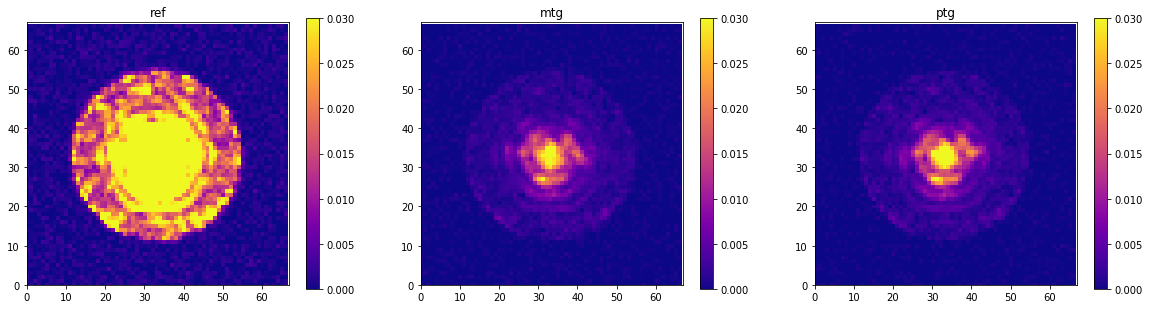

In [9]:
# Ygouf Page 11 Figure 5 Bottom Row, MUF & Noisy
# in units of Photons / second / pixel
plt.figure (figsize=[20,5])
vmaxval = 0.03
plt.subplot(131)
plt.title("ref")
plt.imshow (data_ref,
            cmap = "plasma" ,
            vmax = vmaxval        ,
            vmin = 0)
plt.xlim   ( [ 0, len(data_ref[0]) ] ) 
plt.ylim   ( [ 0, len(data_ref   ) ] )
plt.colorbar()

plt.subplot(132)
plt.title("mtg")
plt.imshow (data_mtg,
            cmap = "plasma" ,
            vmax = vmaxval       ,
            vmin = 0)
plt.xlim   ( [ 0, len(data_mtg[0]) ] ) 
plt.ylim   ( [ 0, len(data_mtg   ) ] )
plt.colorbar()

plt.subplot(133)
plt.title("ptg")
plt.imshow (data_ptg,
            cmap = "plasma" ,
            vmax = vmaxval      ,
            vmin = 0)
plt.xlim   ( [ 0, len(data_ptg[0]) ] ) 
plt.ylim   ( [ 0, len(data_ptg   ) ] )
plt.colorbar()

In [10]:
# SECOND NORMALIZATION; NORMALIZE TO CONTRAST UNITS
"""
# Ygouf Page 10 
# "Then we extract the maximum value from the entire datacube
# (5.5*10^-3 and 9.6*10^-3
# for the noiseless and noisy data respectively)."
# maxflux = 6.307266e-04 # value I got 
"""
maxflux = 9.6e-3 
data_ref=data_ref/maxflux
data_mtg=data_mtg/maxflux
data_ptg=data_ptg/maxflux
# These are not yet "primary-flux-normalized datacubes"

# NOW DIVIDE BY FLUX OF THE SPECIFIC STAR -- TO GET NORMALIZATION IN CONTRAST UNITS
"""
# Krist Page 25
# "Wavelengths and corresponding flux rates for each star are given in os9_fluxes.txt"
# "                ref_star         target_star
#    lambda        Zeta Pup           47 UMa
#      um         photons/sec       photons/sec
#    ...
#   0.57500000   1.19088520e+08   10383809.09954967"
# muf_os9_ccd_images_with_planets.fits header:
# "LAMBDA  =             0.575000 / bandpass central wavelength in microns "
"""
rfcw = 1.19088520e+08    # ref flux at central wavelength
tfcw = 10383809.09954967 # trg flux at central wavelength
data_ref=data_ref/rfcw
data_mtg=data_mtg/tfcw
data_ptg=data_ptg/tfcw
# NOW THESE SHOULD BE NORMALIZED IN CONTRAST UNITS

rrow = data_ref[0]
print("rrow[0]: ",rrow[0])
mrow = data_mtg[0]
print("mrow[0]: ",mrow[0])
prow = data_ptg[0]
print("prow[0]: ",prow[0])

rrow[0]:  -7.024156564765185e-11
mrow[0]:  6.932576074472693e-09
prow[0]:  5.6892866376829466e-09


In [11]:
# COSMOLOGICAL CONSTANT FUDGE2 FACTORS PRIOR TO CONTRAST UNITS
ref_FUDGE2 = 5
data_ref   = data_ref / ref_FUDGE2
trg_FUDGE2 = 5
data_mtg   = data_mtg / trg_FUDGE2
data_ptg   = data_ptg / trg_FUDGE2

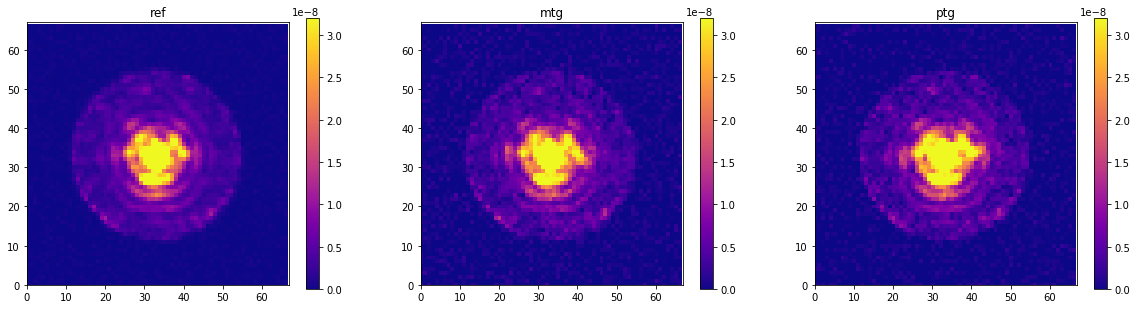

In [12]:
plt.figure (figsize=[20,5])
vmaxval = 1e-8
toptick = 3.2
plt.subplot(131)
plt.title("ref")
plt.imshow (data_ref        ,
            cmap = "plasma" ,
            vmax = vmaxval  ,
            vmin = 0)
plt.xlim   ( [ 0, len(data_ref[0]) ] ) 
plt.ylim   ( [ 0, len(data_ref   ) ] )
plt.colorbar()
plt.clim(0,toptick*vmaxval)

plt.subplot(132)
plt.title("mtg")
plt.imshow (data_mtg        ,
            cmap = "plasma" ,
            vmax = vmaxval  ,
            vmin = 0)
plt.xlim   ( [ 0, len(data_mtg[0]) ] ) 
plt.ylim   ( [ 0, len(data_mtg   ) ] )
plt.colorbar()
plt.clim(0,toptick*vmaxval)

plt.subplot(133)
plt.title("ptg")
plt.imshow (data_ptg        ,
            cmap = "plasma" ,
            vmax = vmaxval  ,
            vmin = 0)
plt.xlim   ( [ 0, len(data_ptg[0]) ] ) 
plt.ylim   ( [ 0, len(data_ptg   ) ] )
plt.colorbar()
plt.clim(0,toptick*vmaxval)